# Flight Delay Prediction

## Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("airlines_delay.csv")

In [3]:
df.shape

(539382, 8)

In [4]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


cleaning time jadi actual time. feature engineer jadi pagi siang sore malam.


The Dataset have 8 columns with 539.382 rows.

* Flight = Flight number
* Time = Departure time (in minutes from 00:00)
* Length = Total flight time (in minutes)
* Airline = Name of the airlines
* AirportFrom = The departing airport
* AirportTo = The destination airport
* DayOfWeek = Day of departure
* Class = Whether they are delayed or not


## EDA

### Missing & duplicated values

In [5]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

There are no missing values!

In [6]:
df['Flight'].value_counts()

16.0      420
5.0       407
9.0       401
8.0       396
62.0      364
         ... 
7814.0      1
4544.0      1
5131.0      1
6969.0      1
3518.0      1
Name: Flight, Length: 6585, dtype: int64

In [7]:
df.duplicated().sum()

216618

216618 Duplicated datas coming from the Flight column

In [8]:
df[df['Flight'] ==16]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
553,16.0,790.0,325.0,HA,HNL,SAN,2,0
4273,16.0,600.0,55.0,WN,HOU,DAL,2,0
4856,16.0,850.0,170.0,B6,FLL,JFK,6,0
11384,16.0,378.0,244.0,UA,SAN,ORD,7,0
17214,16.0,790.0,325.0,HA,HNL,SAN,4,0
...,...,...,...,...,...,...,...,...
535637,16.0,920.0,80.0,WN,LAX,SFO,1,1
536953,16.0,775.0,135.0,WN,AMA,LAS,1,1
537529,16.0,600.0,60.0,WN,HOU,DAL,4,1
537833,16.0,625.0,302.0,CO,LAX,EWR,7,1


From the above, we can see that there are a total of 216618 duplicated data and 0 missing data

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322764 entries, 0 to 539379
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       322764 non-null  float64
 1   Time         322764 non-null  float64
 2   Length       322764 non-null  float64
 3   Airline      322764 non-null  object 
 4   AirportFrom  322764 non-null  object 
 5   AirportTo    322764 non-null  object 
 6   DayOfWeek    322764 non-null  int64  
 7   Class        322764 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 22.2+ MB


After cleaning the data from duplicates and missing values, we are left with 322764 datas.

In [12]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000
mean,2566.701320,807.920471,130.888838,3.951918,0.478994
std,2151.508621,276.710501,68.973069,1.964822,0.499559
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,749.000000,575.000000,81.000000,2.000000,0.000000
50%,1933.000000,805.000000,115.000000,4.000000,0.000000
75%,4021.000000,1035.000000,160.000000,6.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


### Encode Time

In [13]:
def minutes_to_time(minutes):
    hours, mins = divmod(minutes, 60)
    return f"{int(hours):02d}:{int(mins):02d}"

# Apply the function to the 'Time' column
df['Time'] = df['Time'].apply(minutes_to_time)

<ipython-input-13-8dc3e7684f50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].apply(minutes_to_time)


In [14]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,21:36,141.0,DL,ATL,HOU,1,0
1,6948.0,06:00,146.0,OO,COS,ORD,4,0
2,1247.0,19:30,143.0,B6,BOS,CLT,3,0
3,31.0,23:30,344.0,US,OGG,PHX,6,0
4,563.0,11:32,98.0,FL,BMI,ATL,4,0


Time has been encoded to HH:MM format

In [15]:
def categorize_time(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeCategory'] = df['Time'].apply(categorize_time)

<ipython-input-15-e412be183f18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeCategory'] = df['Time'].apply(categorize_time)


In [16]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,TimeCategory
0,2313.0,21:36,141.0,DL,ATL,HOU,1,0,Evening
1,6948.0,06:00,146.0,OO,COS,ORD,4,0,Morning
2,1247.0,19:30,143.0,B6,BOS,CLT,3,0,Evening
3,31.0,23:30,344.0,US,OGG,PHX,6,0,Evening
4,563.0,11:32,98.0,FL,BMI,ATL,4,0,Morning


Added a new column Time category for further analysis

### Data Analysis

<Axes: xlabel='Class', ylabel='count'>

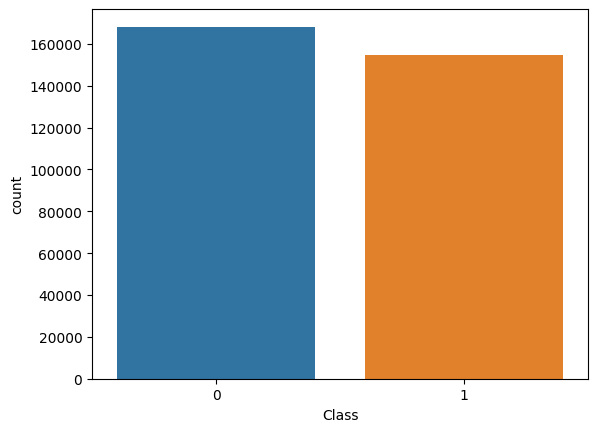

In [17]:
sns.countplot(x='Class', data= df)

In [18]:
df['Class'].value_counts()

0    168162
1    154602
Name: Class, dtype: int64

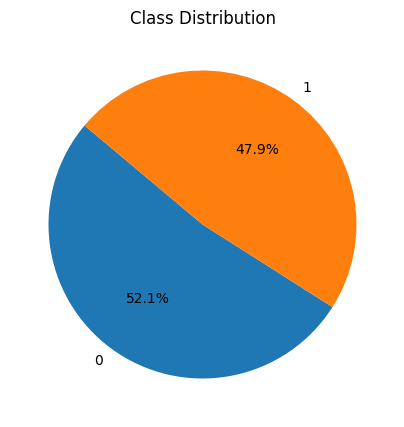

In [19]:
plt.figure(figsize=(5, 5))
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

The distribution of the delay and not delay is 47.9% to 52.1%, This data can be considered as balanced as the difference between the two is not far off and the ratio is also close to 1:1.


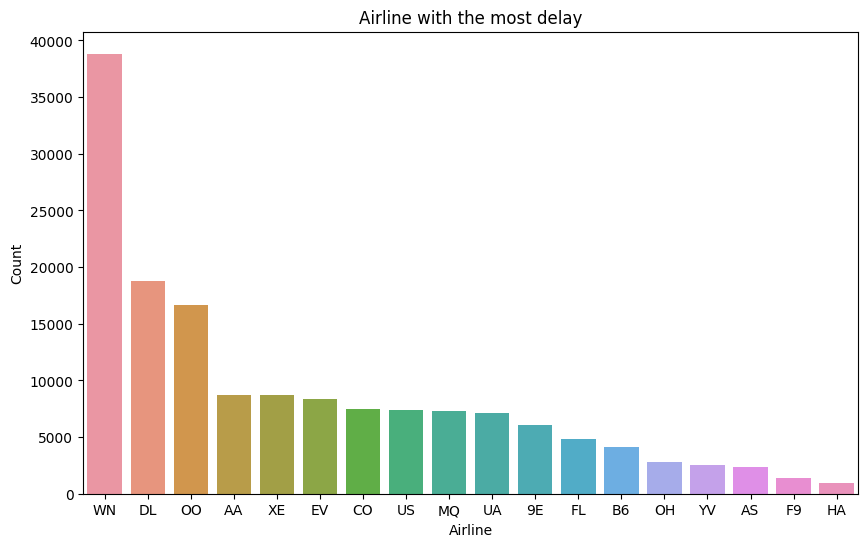

In [20]:
subset_df = df[df['Class'] == 1]
order = subset_df['Airline'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='Airline', order=order)
plt.title('Airline with the most delay')
plt.xlabel('Airline')
plt.ylabel('Count')

plt.show()

Graph above shows that WN is the airline with the most delay, coming in second is DL while the least airline with delay is HA.

In [21]:
airline_percentage = df.groupby('Airline').agg({'Class':'sum', 'Flight':'count'}).reset_index()

In [22]:
airline_percentage['delay_percentage'] = airline_percentage['Class'] / airline_percentage['Flight']*100

In [23]:
airline_percentage = airline_percentage.sort_values('delay_percentage', ascending=False).reset_index(drop=True)

In [24]:
airline_percentage

,Airline,Class,Flight,delay_percentage
0,WN,38830,58593,66.270715
1,CO,7517,13845,54.293969
2,B6,4106,8468,48.488427
3,F9,1421,2981,47.668568
4,OO,16632,35207,47.240606
5,DL,18761,39806,47.131086
6,AA,8710,18896,46.094412
7,HA,977,2214,44.128275
8,EV,8401,19135,43.903841
9,9E,6108,13944,43.803787


In [25]:
df[(df['Airline'] == 'WN') & (df['Class'] == 1)]['AirportFrom'].value_counts()

MDW    2801
LAS    2741
PHX    2145
BWI    2026
DEN    1807
       ... 
HRL      88
JAN      76
MAF      75
ECP      63
CRP      44
Name: AirportFrom, Length: 69, dtype: int64

Text(0, 0.5, 'Count')

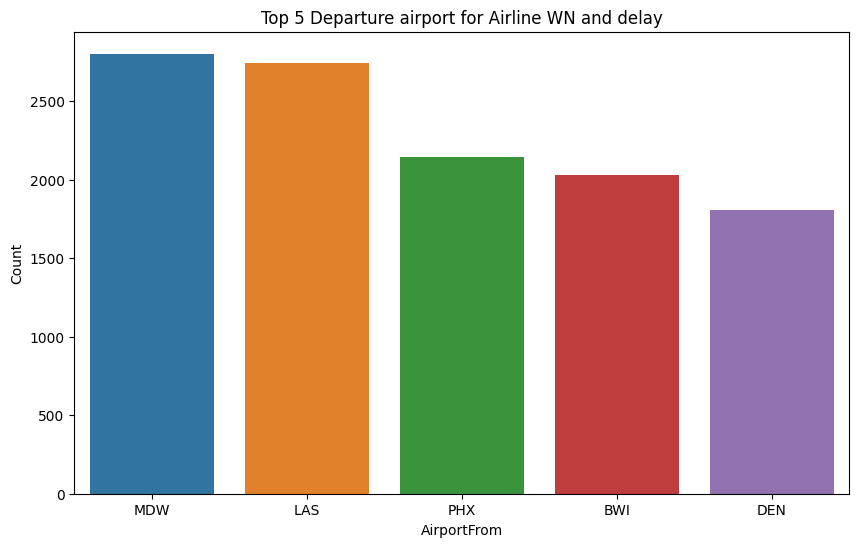

In [26]:
subset_df = df[(df['Airline'] == 'WN') & (df['Class'] == 1)]

top_airports = subset_df['AirportFrom'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='AirportFrom', order=top_airports)

plt.title('Top 5 Departure airport for Airline WN and delay')
plt.xlabel('AirportFrom')
plt.ylabel('Count')

Above graph shows the top 5 departing airport where the airline WN is the most delayed in.

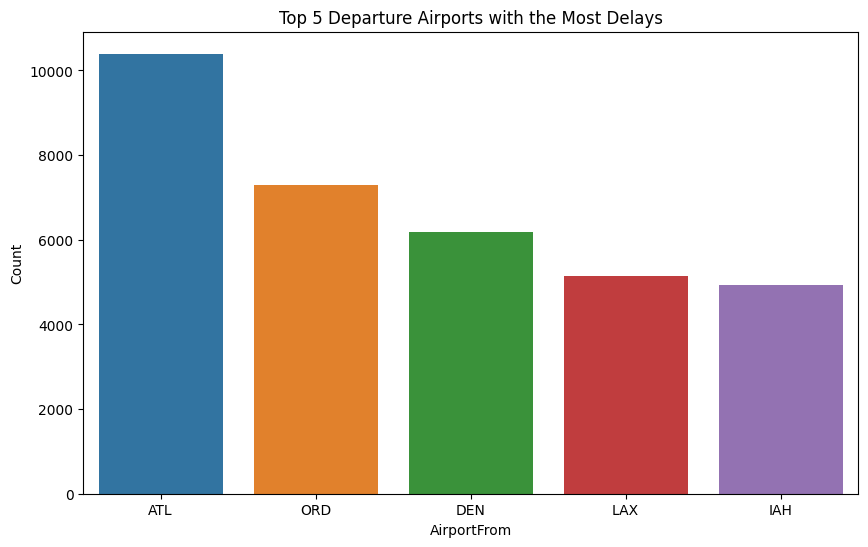

In [27]:
top_airports = df[df['Class'] == 1]['AirportFrom'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['AirportFrom'].isin(top_airports) & (df['Class'] == 1)], x='AirportFrom', order=top_airports)

plt.title('Top 5 Departure Airports with the Most Delays')
plt.xlabel('AirportFrom')
plt.ylabel('Count')

plt.show()


Graph above shows that the departure airport ATL is the most delayed combining with all the airline listed in the dataframe.

In [28]:
df[(df['Airline'] == 'WN') & (df['Class'] == 1)]['DayOfWeek'].value_counts()

5    7847
3    5957
4    5870
2    5768
1    5424
7    4998
6    2966
Name: DayOfWeek, dtype: int64

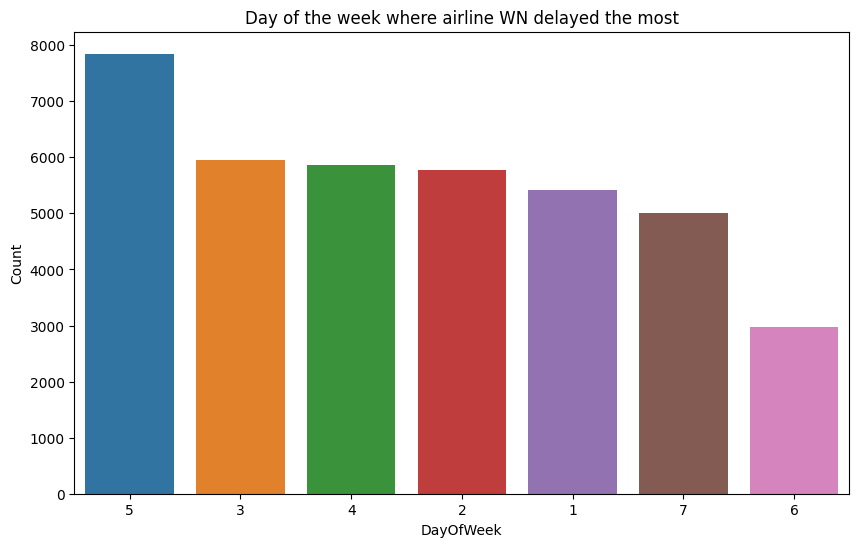

In [29]:
subset_df = df[(df['Airline'] == 'WN') & (df['Class'] == 1)]

plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='DayOfWeek', order=subset_df['DayOfWeek'].value_counts().index)
plt.title('Day of the week where airline WN delayed the most')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')

plt.show()

Day of week dimana Airline WN suka delay

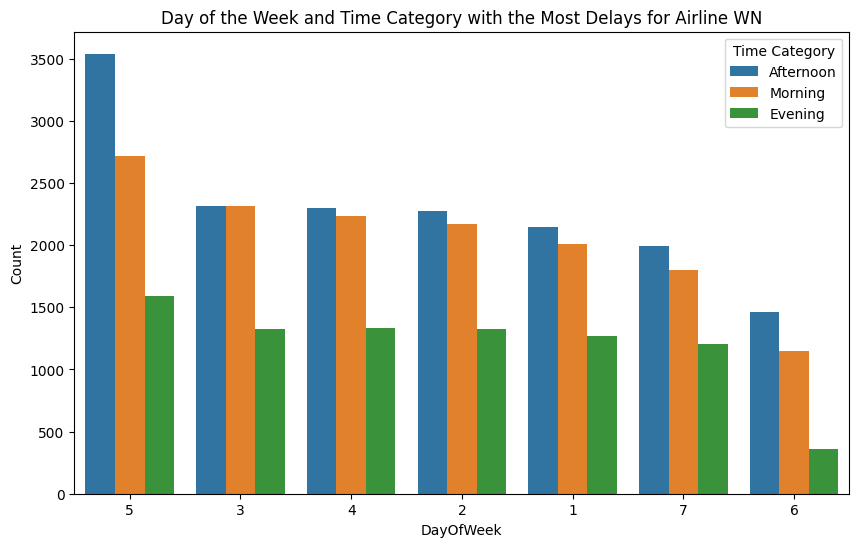

In [30]:
subset_df = df[(df['Airline'] == 'WN') & (df['Class'] == 1)]

plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='DayOfWeek', hue='TimeCategory', order=subset_df['DayOfWeek'].value_counts().index)

plt.title('Day of the Week and Time Category with the Most Delays for Airline WN')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.legend(title='Time Category', loc='upper right')

plt.show()

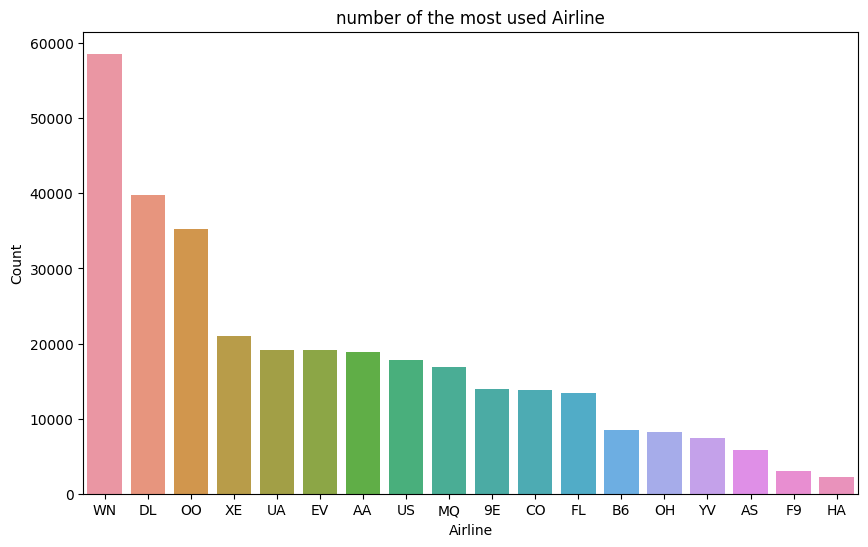

In [31]:
airline_counts = df['Airline'].value_counts()
airline_counts_sorted = airline_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Airline', order=airline_counts_sorted.index)
plt.title('number of the most used Airline')
plt.xlabel('Airline')
plt.ylabel('Count')

plt.show()


In [32]:
airline_counts = df['Airline'].value_counts()
airline_counts_table = pd.DataFrame({'Airline': airline_counts.index, 'Count': airline_counts.values})
airline_counts_table


,Airline,Count
0,WN,58593
1,DL,39806
2,OO,35207
3,XE,20961
4,UA,19155
5,EV,19135
6,AA,18896
7,US,17868
8,MQ,16825
9,9E,13944


WN is the most used airline and coming in second is DL while the least used airline is HA.

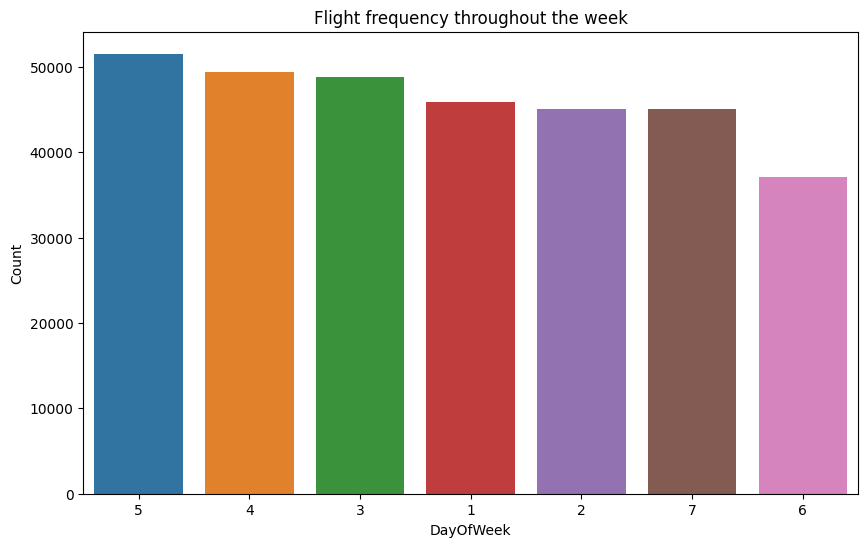

In [33]:
DayOfWeekOrder = df['DayOfWeek'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=DayOfWeekOrder)
plt.title('Flight frequency throughout the week')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')

plt.show()

Flight frequency throughout the week, 4th day (Thursday) being the busiest while the least busiest day is Saturday

In [34]:
df[(df['Airline'] == 'WN') & (df['Class'] == 1)]['DayOfWeek'].value_counts()

5    7847
3    5957
4    5870
2    5768
1    5424
7    4998
6    2966
Name: DayOfWeek, dtype: int64

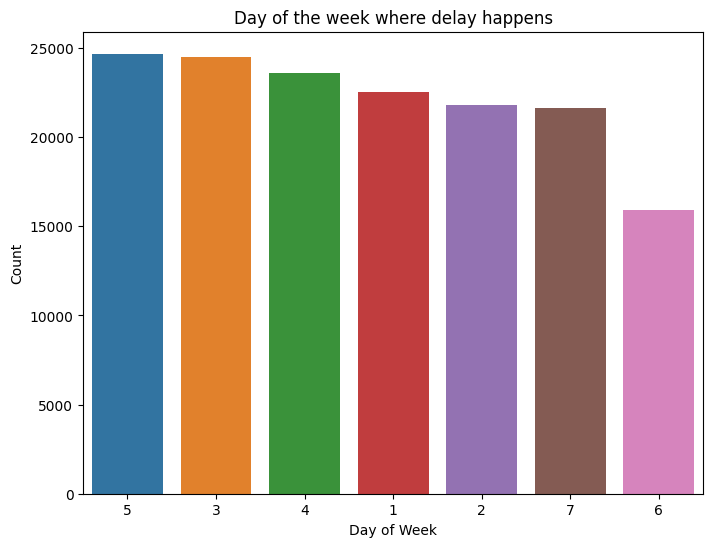

In [35]:
plt.figure(figsize=(8, 6))
df_class_1 = df[df['Class'] == 1]
ax = sns.countplot(x='DayOfWeek', data=df_class_1, order=df_class_1['DayOfWeek'].value_counts().index)
ax.set(xlabel='Day of Week', ylabel='Count', title='Day of the week where delay happens')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

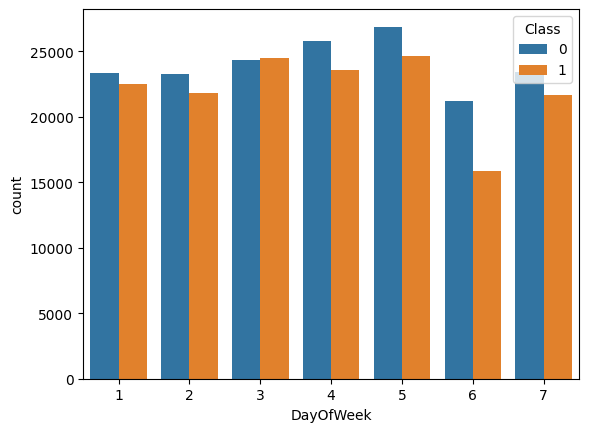

In [36]:
sns.countplot(x='DayOfWeek', hue='Class', data= df)

* From the graph above, we can see that the busiest flights happened the third and fifth day of the week
* Least flights happened on the weekend which is day six and seven
* Due to the busy flight traffic between the third and fifth day, delay happens the most during those three days.

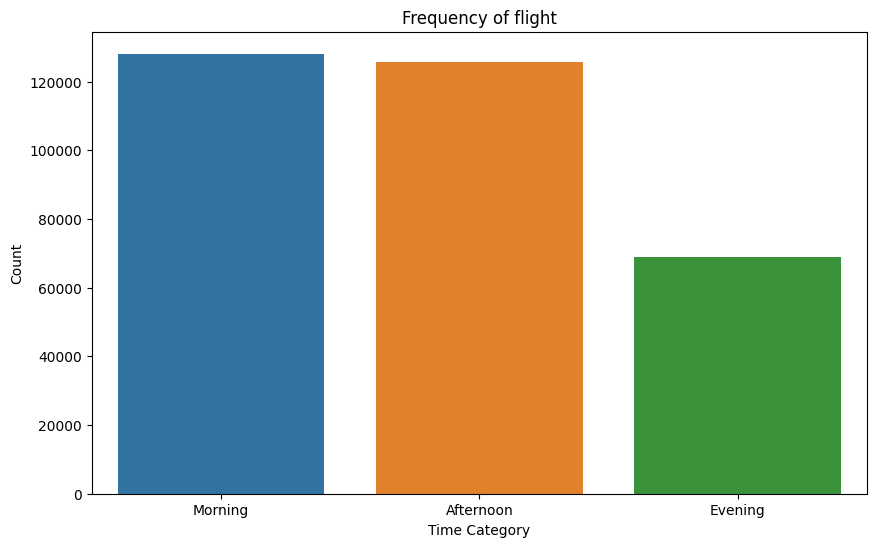

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TimeCategory', order=df['TimeCategory'].value_counts().index)

plt.title('Frequency of flight')
plt.xlabel('Time Category')
plt.ylabel('Count')

plt.show()

Graph shows that most flights occur during the morning between 00:00 to 11:59 while the least flights happens in the evening.

Text(0, 0.5, 'Count')

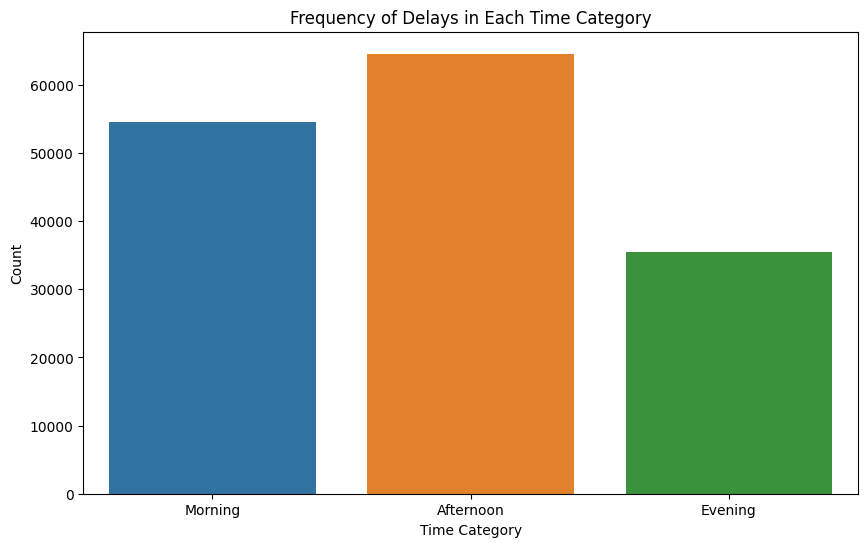

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Class'] == 1], x='TimeCategory', order=df['TimeCategory'].value_counts().index)

plt.title('Frequency of Delays in Each Time Category')
plt.xlabel('Time Category')
plt.ylabel('Count')

Most delay mostly occur in the Afternoon and the least being evening.

<ipython-input-39-2ba58099d8fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

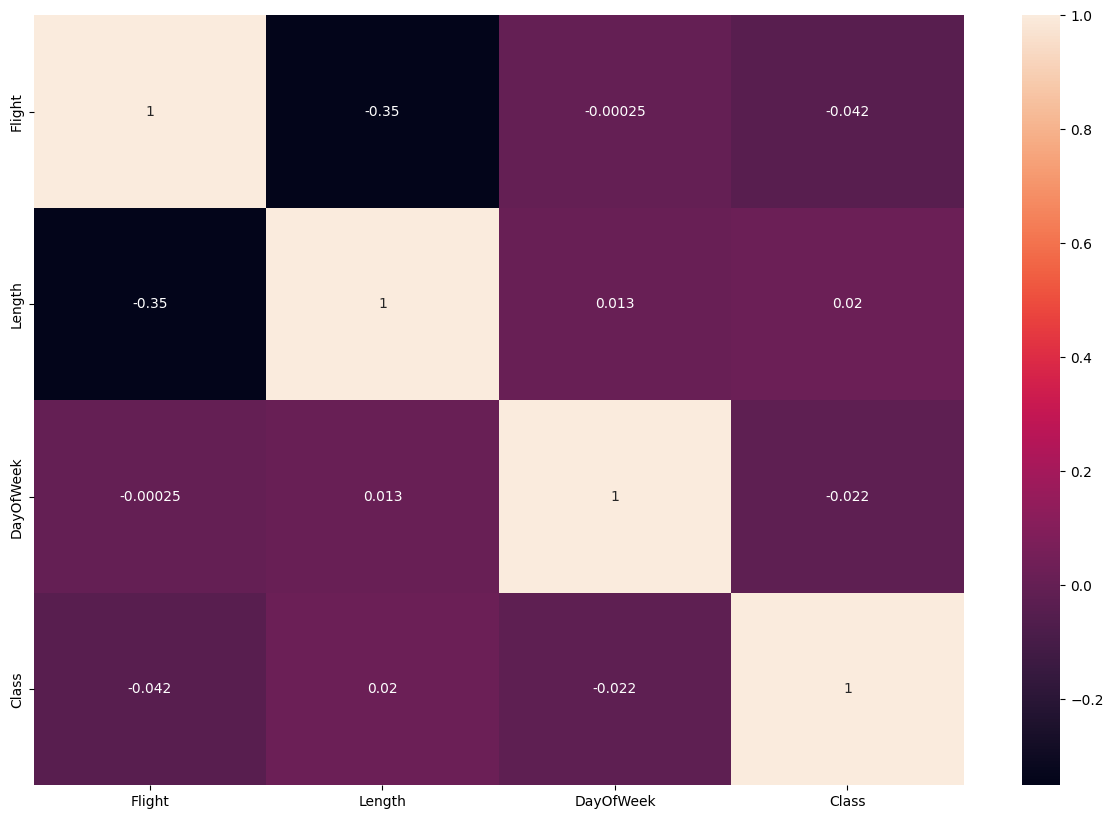

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-40-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Flight,Length,DayOfWeek,Class
Flight,1.000000,-0.351178,-0.000250,-0.041916
Length,-0.351178,1.000000,0.012572,0.020429
DayOfWeek,-0.000250,0.012572,1.000000,-0.021519
Class,-0.041916,0.020429,-0.021519,1.000000


From the heatmap and correlation matrix above, we can see that Time and Class are the most correlated out of all coming in at 0.097.

## Data Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder
columns = ['Airline', 'AirportFrom', 'AirportTo','Time']
label_encoder = LabelEncoder()
for col in columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
df = df.drop(columns=columns)
df.head()

<ipython-input-41-fd20776d4818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])
<ipython-input-41-fd20776d4818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])
<ipython-input-41-fd20776d4818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Flight,Length,DayOfWeek,Class,TimeCategory,Airline_encoded,AirportFrom_encoded,AirportTo_encoded,Time_encoded
0,2313.0,141.0,1,0,Evening,5,16,129,1006
1,6948.0,146.0,4,0,Morning,12,65,208,70
2,1247.0,143.0,3,0,Evening,3,35,60,880
3,31.0,344.0,6,0,Evening,14,203,217,1112
4,563.0,98.0,4,0,Morning,8,32,16,402


Encoded Airline, AirportFrom and AirportTo so we can run it in the model.

<ipython-input-42-2de3b2e4e219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


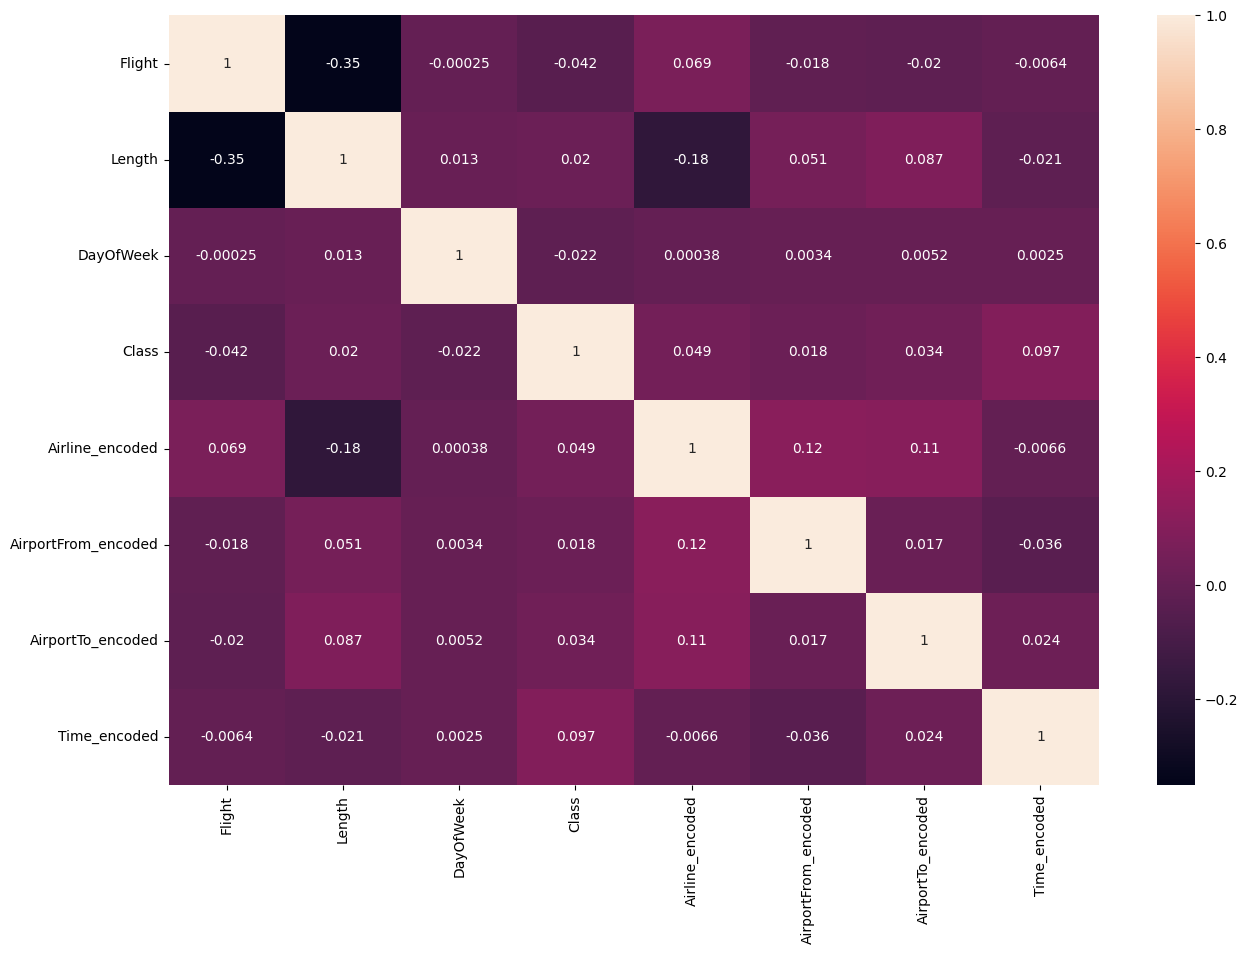

In [42]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [43]:
df.describe()

,Flight,Length,DayOfWeek,Class,Airline_encoded,AirportFrom_encoded,AirportTo_encoded,Time_encoded
count,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000,322764.000000
mean,2566.701320,130.888838,3.951918,0.478994,9.584889,143.388925,143.824336,518.478901
std,2151.508621,68.973069,1.964822,0.499559,5.201205,80.038261,79.870315,275.231926
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,749.000000,81.000000,2.000000,0.000000,5.000000,79.000000,79.000000,285.000000
50%,1933.000000,115.000000,4.000000,0.000000,11.000000,153.000000,153.000000,515.000000
75%,4021.000000,160.000000,6.000000,1.000000,15.000000,208.000000,208.000000,745.000000
max,7814.000000,655.000000,7.000000,1.000000,17.000000,292.000000,292.000000,1130.000000


### Split Dataset

In [44]:
from sklearn.model_selection import train_test_split
# Feature
X = df.drop(['Class','Flight','TimeCategory'],axis=1)
# target
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.20,
                                                random_state = 42)

## Modelling the dataset

### Knn

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 0, 1, 1])

In [47]:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_knn

array([1, 1, 0, ..., 0, 1, 0])

In [48]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score
print(classification_report(y_test, y_pred_knn, digits=6))

              precision    recall  f1-score   support

           0   0.491450  0.515934  0.503394     33702
           1   0.440765  0.416777  0.428436     30851

    accuracy                       0.468545     64553
   macro avg   0.466108  0.466356  0.465915     64553
weighted avg   0.467227  0.468545  0.467570     64553



In [49]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_knn)
acc1

0.46854522640311064

In [50]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_knn)
acc2

0.6723145024805295

### KNN tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
knn1 = KNeighborsClassifier()
param_dist = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn1_rndm = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5
)

knn1_rndm.fit(X_train, y_train)

In [ ]:
best_knn = knn1_rndm.best_estimator_

In [ ]:
y_pred_knn1 = best_knn.predict(X_test)
y_pred_knn1

In [ ]:
y_pred_train_knn1 = best_knn.predict(X_train)
y_pred_train_knn1

In [ ]:
print(classification_report(y_test, y_pred_knn1, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train_knn1)
acc

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

In [ ]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

In [ ]:
y_pred_train_logreg = logreg.predict(X_train)
y_pred_train_logreg

In [ ]:
print(classification_report(y_test, y_pred_logreg, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_logreg)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_logreg)
acc2

### Logistic Regression Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(random_state=42)

param_distributions = {
    "solver": ["lbfgs", "liblinear", "sag", "saga"],
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.logspace(-4, 4, 10),
    "max_iter": [100, 200, 500, 1000]
}
logreg1_rndm = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5
)
logreg1_rndm.fit(X_train, y_train)

In [ ]:
best_logreg = logreg1_rndm.best_estimator_

In [ ]:
y_pred_logreg1 = best_logreg.predict(X_test)
y_pred_logreg1

In [ ]:
y_pred_train_logreg1 = best_logreg.predict(X_train)
y_pred_train_logreg1

In [ ]:
print(classification_report(y_test, y_pred_logreg1, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train_logreg1)
acc

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_logreg1)
acc

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)

In [ ]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

In [ ]:
y_pred_train_dt = model_dt.predict(X_train)
y_pred_train_dt

In [ ]:
print(classification_report(y_test, y_pred_dt, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_dt)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_dt)
acc2

### Decision Tree Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt1 = DecisionTreeClassifier(random_state=42)
param_distributions = {
    "max_depth": range(3, 11),
    "min_samples_split": range(2, 21),
    "min_samples_leaf": range(1, 11),
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2", None]
}
model_rndm = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring="accuracy"
)

model_rndm.fit(X_train,y_train)

In [ ]:
best_dt = model_rndm.best_estimator_

In [ ]:
y_pred_dt1 = best_dt.predict(X_test)
y_pred_dt1

In [ ]:
y_pred_train_dt1 = best_dt.predict(X_train)
y_pred_train_dt1

In [ ]:
print(classification_report(y_test, y_pred_dt1, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train_dt1)
acc

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

In [ ]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_train_rf

In [ ]:
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_rf)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_rf)
acc2

### Random Forest Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(random_state=42)
parameter = {
    'n_estimators':(10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameter, cv=5, scoring='accuracy',n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

In [ ]:
best_rf_clf = rf_clf_randomcv.best_estimator_

In [ ]:
y_pred_rfclf = best_rf_clf.predict(X_test)
y_pred_rfclf

In [ ]:
y_pred_train_rfclf = best_rf_clf.predict(X_train)
y_pred_train_rfclf

In [ ]:
print(classification_report(y_test, y_pred_rfclf, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train, y_pred_train_rfclf)
acc1

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

In [ ]:
y_pred_train_gnb = gnb.predict(X_train)
y_pred_train_gnb

In [ ]:
print(classification_report(y_test, y_pred_gnb, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_gnb)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_gnb)
acc2

### Naive Bayes Tuning

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
param_distributions = {
    "var_smoothing": np.logspace(0, -9, num=100)
}
nb_rndm = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring="accuracy"
)

nb_rndm.fit(X_train, y_train)

In [ ]:
best_nb = nb_rndm.best_estimator_

In [ ]:
y_pred_nb = best_nb.predict(X_test)
y_pred_nb

In [ ]:
y_pred_train_nb = best_nb.predict(X_train)
y_pred_nb

In [ ]:
print(classification_report(y_test, y_pred_nb, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_nb)
acc2

### Gradient Boosted Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbt = GradientBoostingClassifier(random_state=42)

gbt.fit(X_train, y_train)

In [ ]:
y_pred_gbt = gbt.predict(X_test)
y_pred_gbt

In [ ]:
y_pred_train_gbt = gbt.predict(X_train)
y_pred_train_gbt

In [ ]:
print(classification_report(y_test, y_pred_gbt, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_gbt)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_gbt)
acc2

### GBT Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt1 = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}
gbt1_randomcv = RandomizedSearchCV(gbt1, parameter, cv=5, scoring='accuracy',n_iter=10)
gbt1_randomcv.fit(X_train, y_train)

In [ ]:
best_gbt1 = gbt1_randomcv.best_estimator_

In [ ]:
y_pred_train_gbt1 = best_gbt1.predict(X_train)
y_pred_train_gbt1

In [ ]:
y_pred_gbt1 = best_gbt1.predict(X_test)
y_pred_gbt1

In [ ]:
print(classification_report(y_test, y_pred_gbt1, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train, y_pred_train_gbt1)
acc1

### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

In [ ]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_train_xgb

In [ ]:
print(classification_report(y_test, y_pred_xgb, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_xgb)
acc1

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred_train_xgb)
acc2

### XGBoost Tuning

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb1 = XGBClassifier(random_state=42)
param_distributions = {
    "max_depth": range(3, 11),
    "min_child_weight": range(1, 11),
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": range(100, 1000, 100)
}
xgb_rndm = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
xgb_rndm.fit(X_train, y_train)

In [ ]:
best_xg = xgb_rndm.best_estimator_

In [ ]:
y_pred_train_xg1 = best_xg.predict(X_train)
y_pred_train_xg1

In [ ]:
y_pred_xg1 = best_xg.predict(X_test)
y_pred_xg1

In [ ]:
print(classification_report(y_test, y_pred_xg1, digits=6))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train_xg1)
acc

In [ ]:
evaluasi = [{'Model': 'KNN', 'Train': '62.69%', 'Test': '53.53%'},
            {'Model': 'Logistic Regression', 'Train': '62.72%', 'Test': '53.42%'},
            {'Model': 'Decision Tree', 'Train': '59.09%', 'Test': '59.10%'},
            {'Model': 'Random Forest', 'Train': '58.59%', 'Test': '58.45%'},
            {'Model': 'Naive Bayes', 'Train': '55.11%', 'Test': '55.44%'},
            {'Model': 'Gradient Boosted Tree', 'Train': '59.96%', 'Test': '59.67%'},
            {'Model': 'XGBoost', 'Train': '60.02%', 'Test': '59.81%'}]
Evaluation = pd.DataFrame(evaluasi)

In [ ]:
Evaluation

## Evaluation

Prediction : Delay, Actual: Delay --> Correct
Prediction : Not Delay, Actual : Not Delay --> Correct
Prediction : Delay, Actual: Not Delay --> Wrong
Prediction : Not Delay, Actual: Delay --> Wrong
59.81% Correct prediction

With this dataset, I ran through numerous different model with hyperparameter tuning, thus the results are in. XGBoost has the highest accuracy score of 59.81% to predict delay, while the lowest being Logistic Regression with only 53.42% accuracy. However, the recall for 1 is only 44.62% is low, this suggests that the model struggles to correctly identify the positive cases. Forexample in 100 delay it will only identify as 44 delays.